In [1]:
import warnings
warnings.filterwarnings('ignore') # warnings are for the weak

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

import os
import sys
import re
import sys

import fna

import pipeline as pipeline

sys.path.append("../demyelination/") # we need this to successfully read pickle files
sys.path.append("../") # we need this to successfully read pickle files

## aone_lowergamma

After inspection of the fullmodel, it appears the CTX has highly oscillatory activity. This exp was done to explore a lower gamma_aone which leads to lower oscillations

In [9]:
# ! ls ../demyelination/data/aone_lowergamma/activity/

In [3]:
files2 = pipeline.readfiles("../demyelination/data/aone_lowergamma/activity/");
df = pipeline.preparedf(files2, (2000, 4000));

** mayavi.mlab ** package is not installed. To have functions using mayavi.mlab please install the package.
** pyspike ** package is not installed. To have functions using pyspike please install the package.
** pyspike ** package is not installed. To have functions using pyspike please install the package.
** mnist.loader ** package is not installed. To have functions using mnist.loader please install the package.
** tables ** package is not installed. To have functions using tables please install the package.


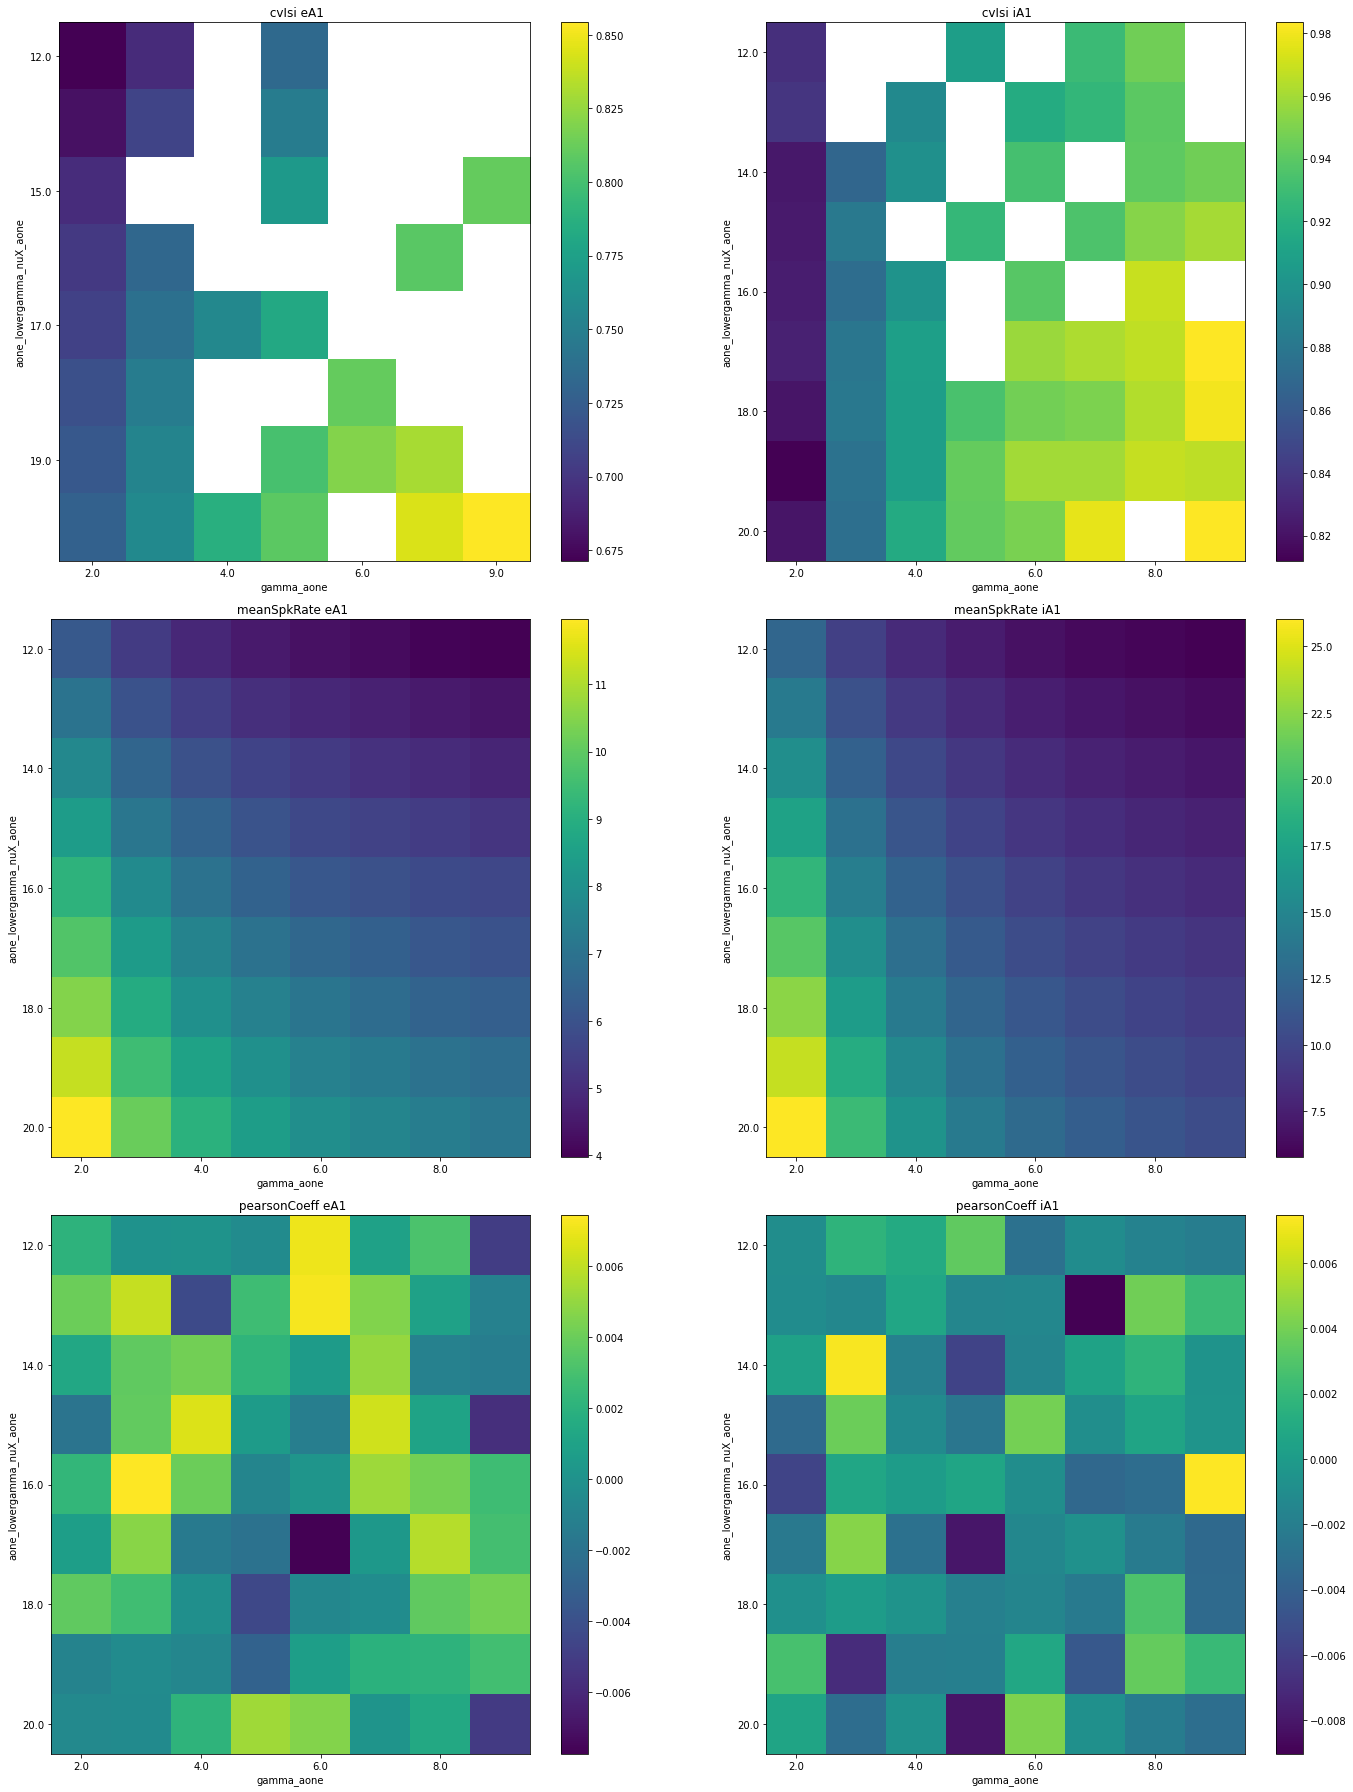

In [4]:
fig, ax = plt.subplots(nrows=3, ncols=2)

fig.set_size_inches(20, 25)
plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

varone = "aone_lowergamma_nuX_aone"
vartwo = "gamma_aone"
parts = ["eA1", "iA1"]

dfFilter = df[varone] > 11
# dfFilter = [True] * df.shape[0]

pipeline.makesubplot(df[dfFilter], fig, ax[0], "cvIsi", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[1], "meanSpkRate", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[2], "pearsonCoeff", varone, vartwo, parts)

#makesubplot(df[dfFilter], fig, ax[3], "meanBurstSpikePercentageCerina", varone, vartwo, parts)

#makesubplot(df[dfFilter], fig, ax[4], "meanBurstSpikePercentageMIT", varone, vartwo, parts)

fig.tight_layout()

#plt.savefig("/home/pbr-student/Downloads/thesis-plots/adaptation-aone_winputaone=15.pdf")

eA1 MEAN SPIKING RATE:  8.222 8.595 8.4005
eA1 PEARSON COEFF:  0.00267415117784954 0.010888762224583183 0.003959280320605338


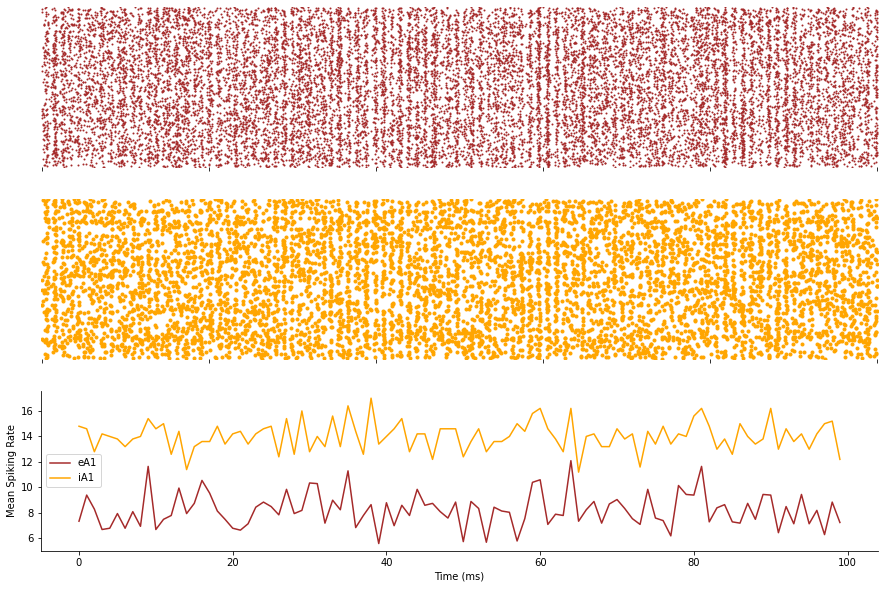

In [11]:
pth = "../demyelination/data/aone_lowergamma/activity/"
f = ['spk_aone_lowergamma_nuX_aone=20_gamma_aone=5']

p = pd.read_pickle(pth + f[0])
fig, ax = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches(15, 10)
#plt.ylim(0, 45)
#plt.title(f[0])

for x in [0, 1]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])

tstart = 1000
tstop = 2000
    
p.spikeobj['eA1'].time_slice(tstart, tstop).raster_plot(ax=ax[0], dt=10, display=False, color='brown', ms=2)
p.spikeobj['iA1'].time_slice(tstart, tstop).raster_plot(ax=ax[1], dt=10, display=False, color='orange')

# x, y = smoothedspikes(p.spikeobj['eA1'].time_slice(tstart, tstop))
# ax[2].plot(x, y, label='eA1', c='brown')
ax[2].plot(p.spikeobj['eA1'].time_slice(tstart, tstop).firing_rate(10, average=True), label='eA1', c='brown')

# x, y = smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
# ax[2].plot(x, y, label='iA1', c='orange')
ax[2].plot(p.spikeobj['iA1'].time_slice(tstart, tstop).firing_rate(10, average=True), label='iA1', c='orange')

plt.xlabel("Time (ms)")
plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

#plt.xticks(range(0, 60+1, 10), range(tstart, tstop+1, 100))
ax[2].spines.right.set_visible(False)
ax[2].spines.top.set_visible(False)

ax[2].legend()

#plt.show()

print("eA1 MEAN SPIKING RATE: ", p.spikeobj['eA1'].time_slice(500, 2000).mean_rate(), \
      p.spikeobj['eA1'].time_slice(2000, 2100).mean_rate(),\
      p.spikeobj['eA1'].time_slice(3000, 5000).mean_rate())
print("eA1 PEARSON COEFF: ", p.spikeobj['eA1'].time_slice(500, 2000).pairwise_pearson_corrcoeff(nb_pairs=500, time_bin=10)[0], \
      p.spikeobj['eA1'].time_slice(2000, 2100).pairwise_pearson_corrcoeff(nb_pairs=500, time_bin=2)[0],\
      p.spikeobj['eA1'].time_slice(3000, 5000).pairwise_pearson_corrcoeff(nb_pairs=500, time_bin=2)[0])


eA1 MEAN SPIKING RATE:  8.814666666666668 9.52 9.1195
eA1 PEARSON COEFF:  0.002317608258215756 -0.004796496794526589 0.004963601673942002


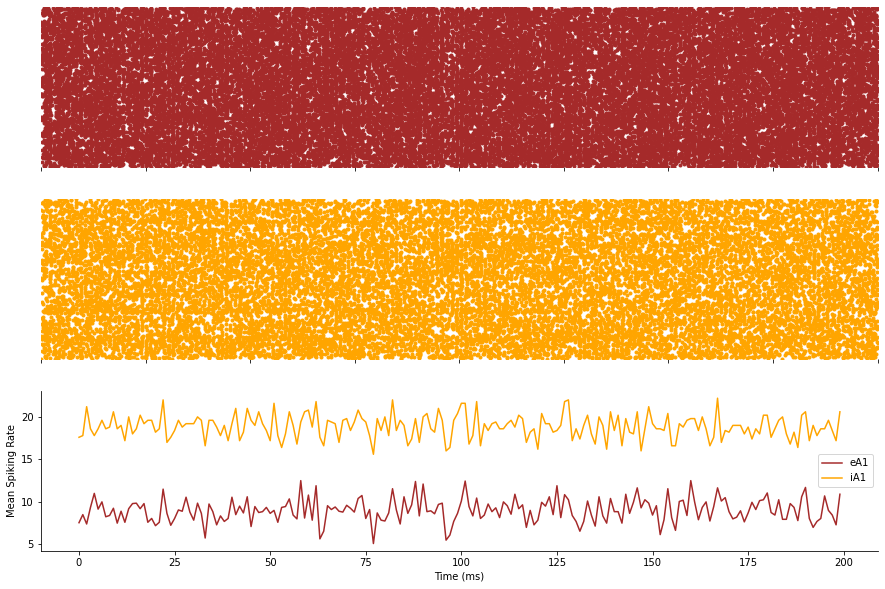

In [31]:
pth = "../demyelination/data/aone_lowergamma/activity/"
f = ['spk_aone_lowergamma_nuX_aone=16_gamma_aone=2']

p = pd.read_pickle(pth + f[0])
fig, ax = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches(15, 10)
#plt.ylim(0, 45)
#plt.title(f[0])

for x in [0, 1]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])

tstart = 1000
tstop = 3000
    
p.spikeobj['eA1'].time_slice(tstart, tstop).raster_plot(ax=ax[0], dt=10, display=False, color='brown')
p.spikeobj['iA1'].time_slice(tstart, tstop).raster_plot(ax=ax[1], dt=10, display=False, color='orange')

# x, y = smoothedspikes(p.spikeobj['eA1'].time_slice(tstart, tstop))
# ax[2].plot(x, y, label='eA1', c='brown')
ax[2].plot(p.spikeobj['eA1'].time_slice(tstart, tstop).firing_rate(10, average=True), label='eA1', c='brown')

# x, y = smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
# ax[2].plot(x, y, label='iA1', c='orange')
ax[2].plot(p.spikeobj['iA1'].time_slice(tstart, tstop).firing_rate(10, average=True), label='iA1', c='orange')

plt.xlabel("Time (ms)")
plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

#plt.xticks(range(0, 60+1, 10), range(tstart, tstop+1, 100))
ax[2].spines.right.set_visible(False)
ax[2].spines.top.set_visible(False)

ax[2].legend()

#plt.show()

print("eA1 MEAN SPIKING RATE: ", p.spikeobj['eA1'].time_slice(500, 2000).mean_rate(), \
      p.spikeobj['eA1'].time_slice(2000, 2100).mean_rate(),\
      p.spikeobj['eA1'].time_slice(3000, 5000).mean_rate())
print("eA1 PEARSON COEFF: ", p.spikeobj['eA1'].time_slice(500, 2000).pairwise_pearson_corrcoeff(nb_pairs=500, time_bin=10)[0], \
      p.spikeobj['eA1'].time_slice(2000, 2100).pairwise_pearson_corrcoeff(nb_pairs=500, time_bin=10)[0],\
      p.spikeobj['eA1'].time_slice(3000, 5000).pairwise_pearson_corrcoeff(nb_pairs=500, time_bin=10)[0])


## aone_lowergamma_syntau
We changed the synaptic time constants

In [ ]:
files2 = pipeline.readfiles("../demyelination/data/aone_lowergamma_syntau/activity/");
df = pipeline.preparedf(files2, (2000, 4000));

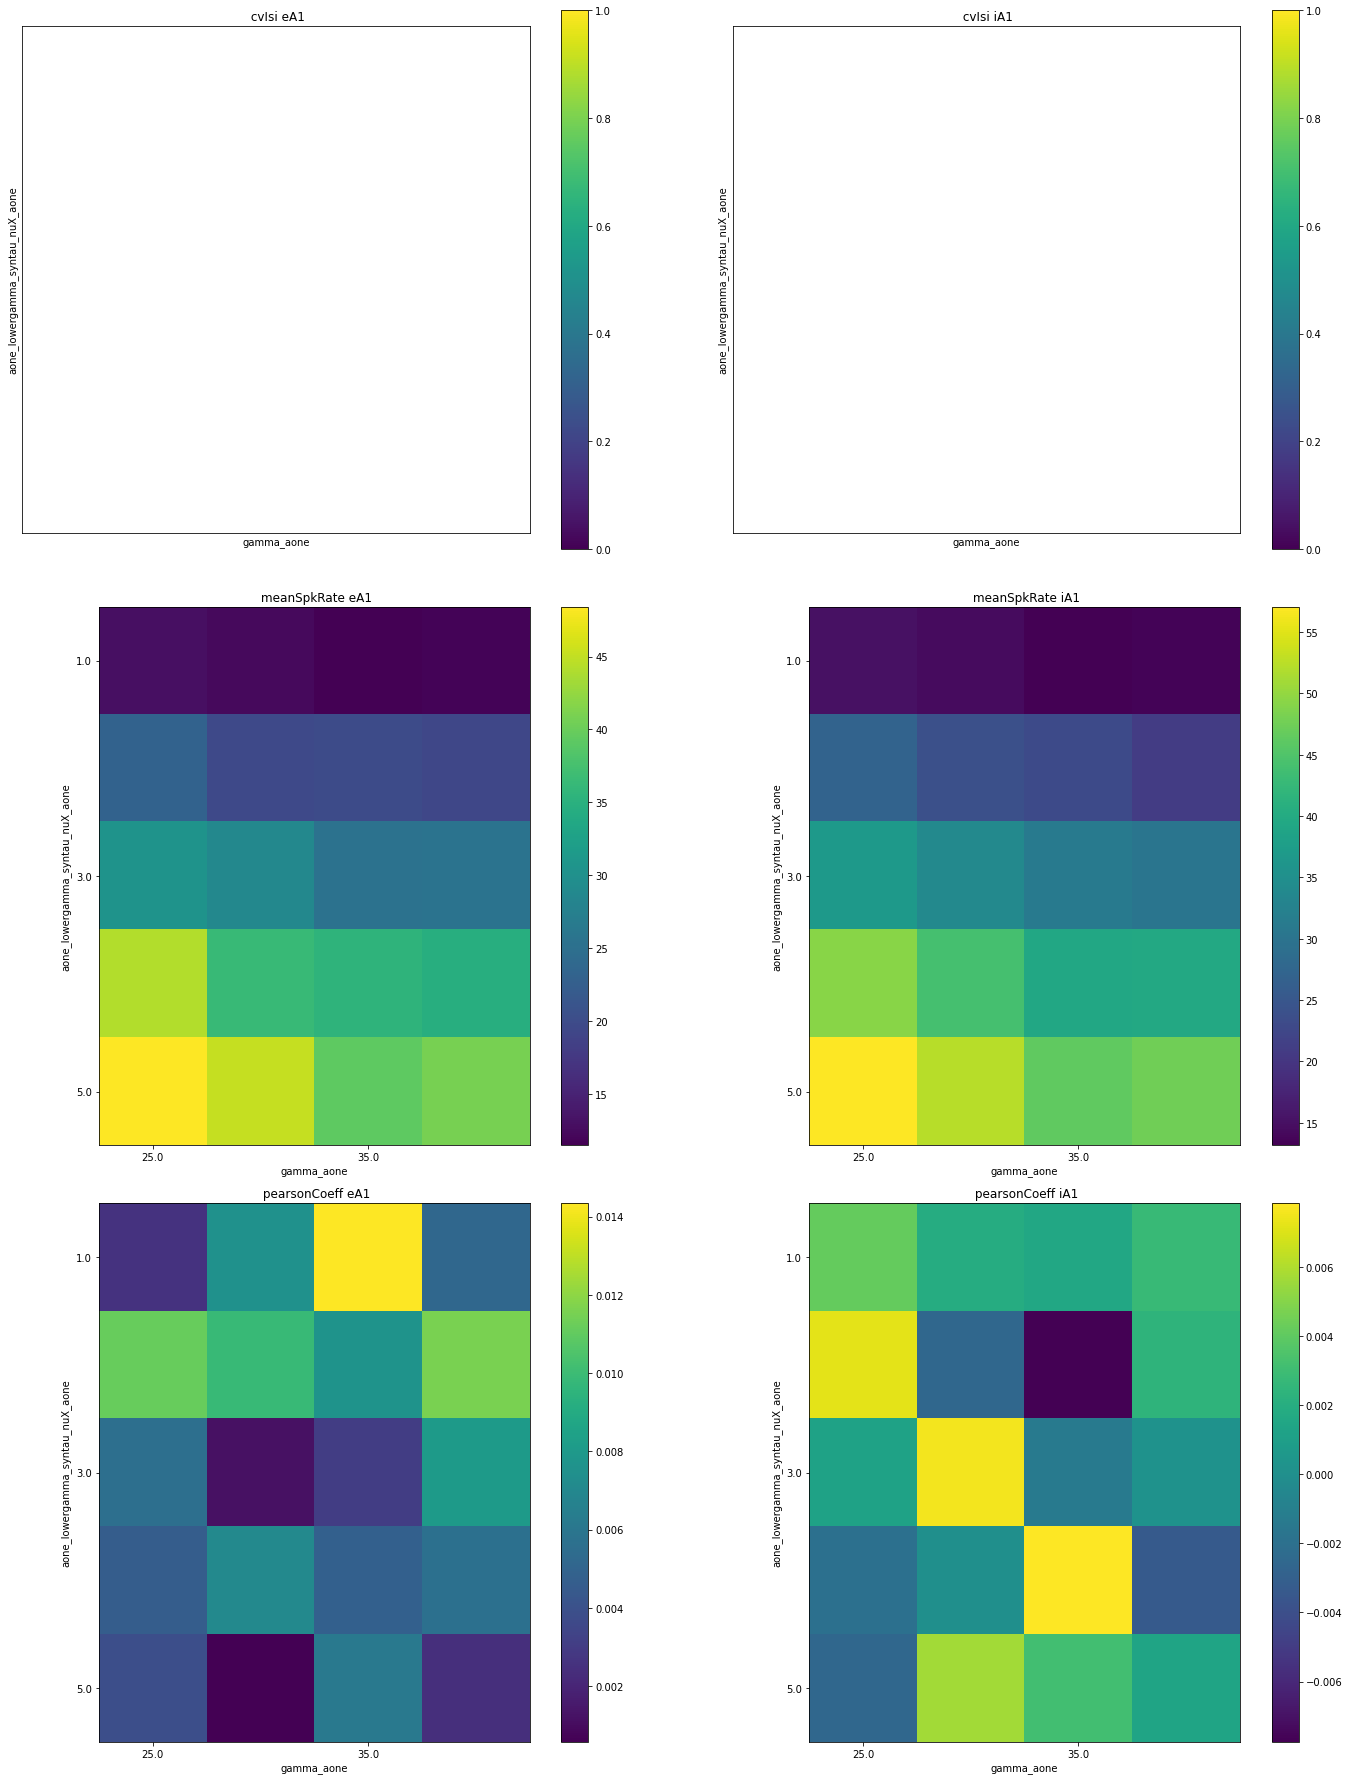

In [44]:
fig, ax = plt.subplots(nrows=3, ncols=2)

fig.set_size_inches(20, 25)
plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

varone = "aone_lowergamma_syntau_nuX_aone"
vartwo = "gamma_aone"
parts = ["eA1", "iA1"]

dfFilter = df[vartwo] > 20
# dfFilter = [True] * df.shape[0]

pipeline.makesubplot(df[dfFilter], fig, ax[0], "cvIsi", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[1], "meanSpkRate", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[2], "pearsonCoeff", varone, vartwo, parts)

#makesubplot(df[dfFilter], fig, ax[3], "meanBurstSpikePercentageCerina", varone, vartwo, parts)

#makesubplot(df[dfFilter], fig, ax[4], "meanBurstSpikePercentageMIT", varone, vartwo, parts)

fig.tight_layout()

#plt.savefig("/home/pbr-student/Downloads/thesis-plots/adaptation-aone_winputaone=15.pdf")

eA1 MEAN SPIKING RATE:  3.2696666666666667 5.43 3.193
iA1 MEAN SPIKING RATE:  3.6866666666666665 5.82 3.708
eA1 PEARSON COEFF:  0.018058132926035052 0.06840288666286952 0.0192503936075952


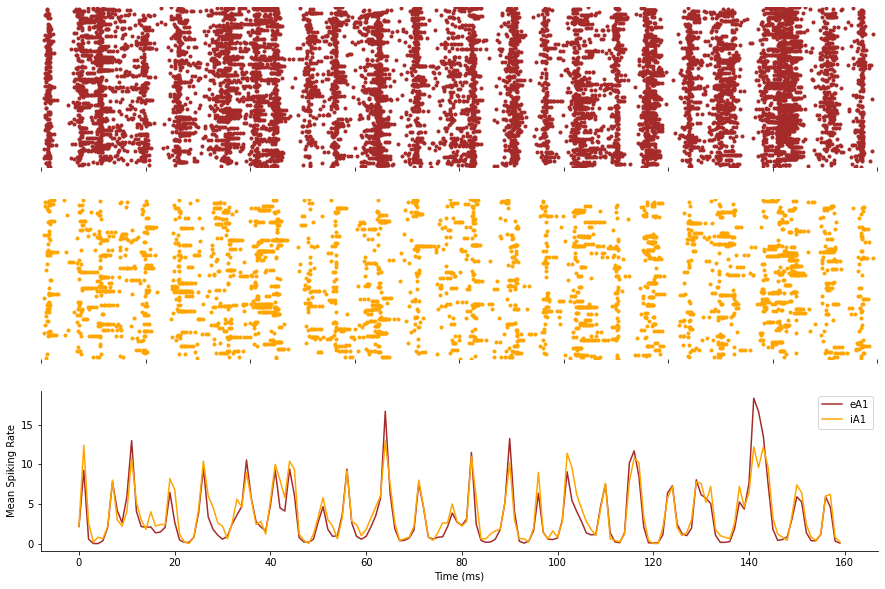

In [51]:
pth = "../demyelination/data/aone_lowergamma_syntau/activity/"
f = ['spk_aone_lowergamma_syntau_nuX_aone=0.1_gamma_aone=25']

p = pd.read_pickle(pth + f[0])
fig, ax = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches(15, 10)
#plt.ylim(0, 45)
#plt.title(f[0])

for x in [0, 1]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])

tstart = 000
tstop = 1600
    
p.spikeobj['eA1'].time_slice(tstart, tstop).raster_plot(ax=ax[0], dt=10, display=False, color='brown')
p.spikeobj['iA1'].time_slice(tstart, tstop).raster_plot(ax=ax[1], dt=10, display=False, color='orange')

# x, y = smoothedspikes(p.spikeobj['eA1'].time_slice(tstart, tstop))
# ax[2].plot(x, y, label='eA1', c='brown')
ax[2].plot(p.spikeobj['eA1'].time_slice(tstart, tstop).firing_rate(10, average=True), label='eA1', c='brown')

# x, y = smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
# ax[2].plot(x, y, label='iA1', c='orange')
ax[2].plot(p.spikeobj['iA1'].time_slice(tstart, tstop).firing_rate(10, average=True), label='iA1', c='orange')

plt.xlabel("Time (ms)")
plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

#plt.xticks(range(0, 60+1, 10), range(tstart, tstop+1, 100))
ax[2].spines.right.set_visible(False)
ax[2].spines.top.set_visible(False)

ax[2].legend()

#plt.show()

print("eA1 MEAN SPIKING RATE: ", p.spikeobj['eA1'].time_slice(500, 2000).mean_rate(), \
      p.spikeobj['eA1'].time_slice(2000, 2100).mean_rate(),\
      p.spikeobj['eA1'].time_slice(3000, 5000).mean_rate())
print("iA1 MEAN SPIKING RATE: ", p.spikeobj['iA1'].time_slice(500, 2000).mean_rate(), \
      p.spikeobj['iA1'].time_slice(2000, 2100).mean_rate(),\
      p.spikeobj['iA1'].time_slice(3000, 5000).mean_rate())
print("eA1 PEARSON COEFF: ", p.spikeobj['eA1'].time_slice(500, 2000).pairwise_pearson_corrcoeff(nb_pairs=500, time_bin=10)[0], \
      p.spikeobj['eA1'].time_slice(2000, 2100).pairwise_pearson_corrcoeff(nb_pairs=500, time_bin=10)[0],\
      p.spikeobj['eA1'].time_slice(3000, 5000).pairwise_pearson_corrcoeff(nb_pairs=500, time_bin=10)[0])


## aone_syntau_bgnoise
The change in the synaptic decay constant required a lower bg noise. This exp explored the rate of the noise generator, the weight of its connection to the CTX and gamma_aone.

In [10]:
files2 = pipeline.readfiles("../demyelination/data/aone_syntau_bgnoise/activity/");
df = pipeline.preparedf(files2, (2000, 4000));

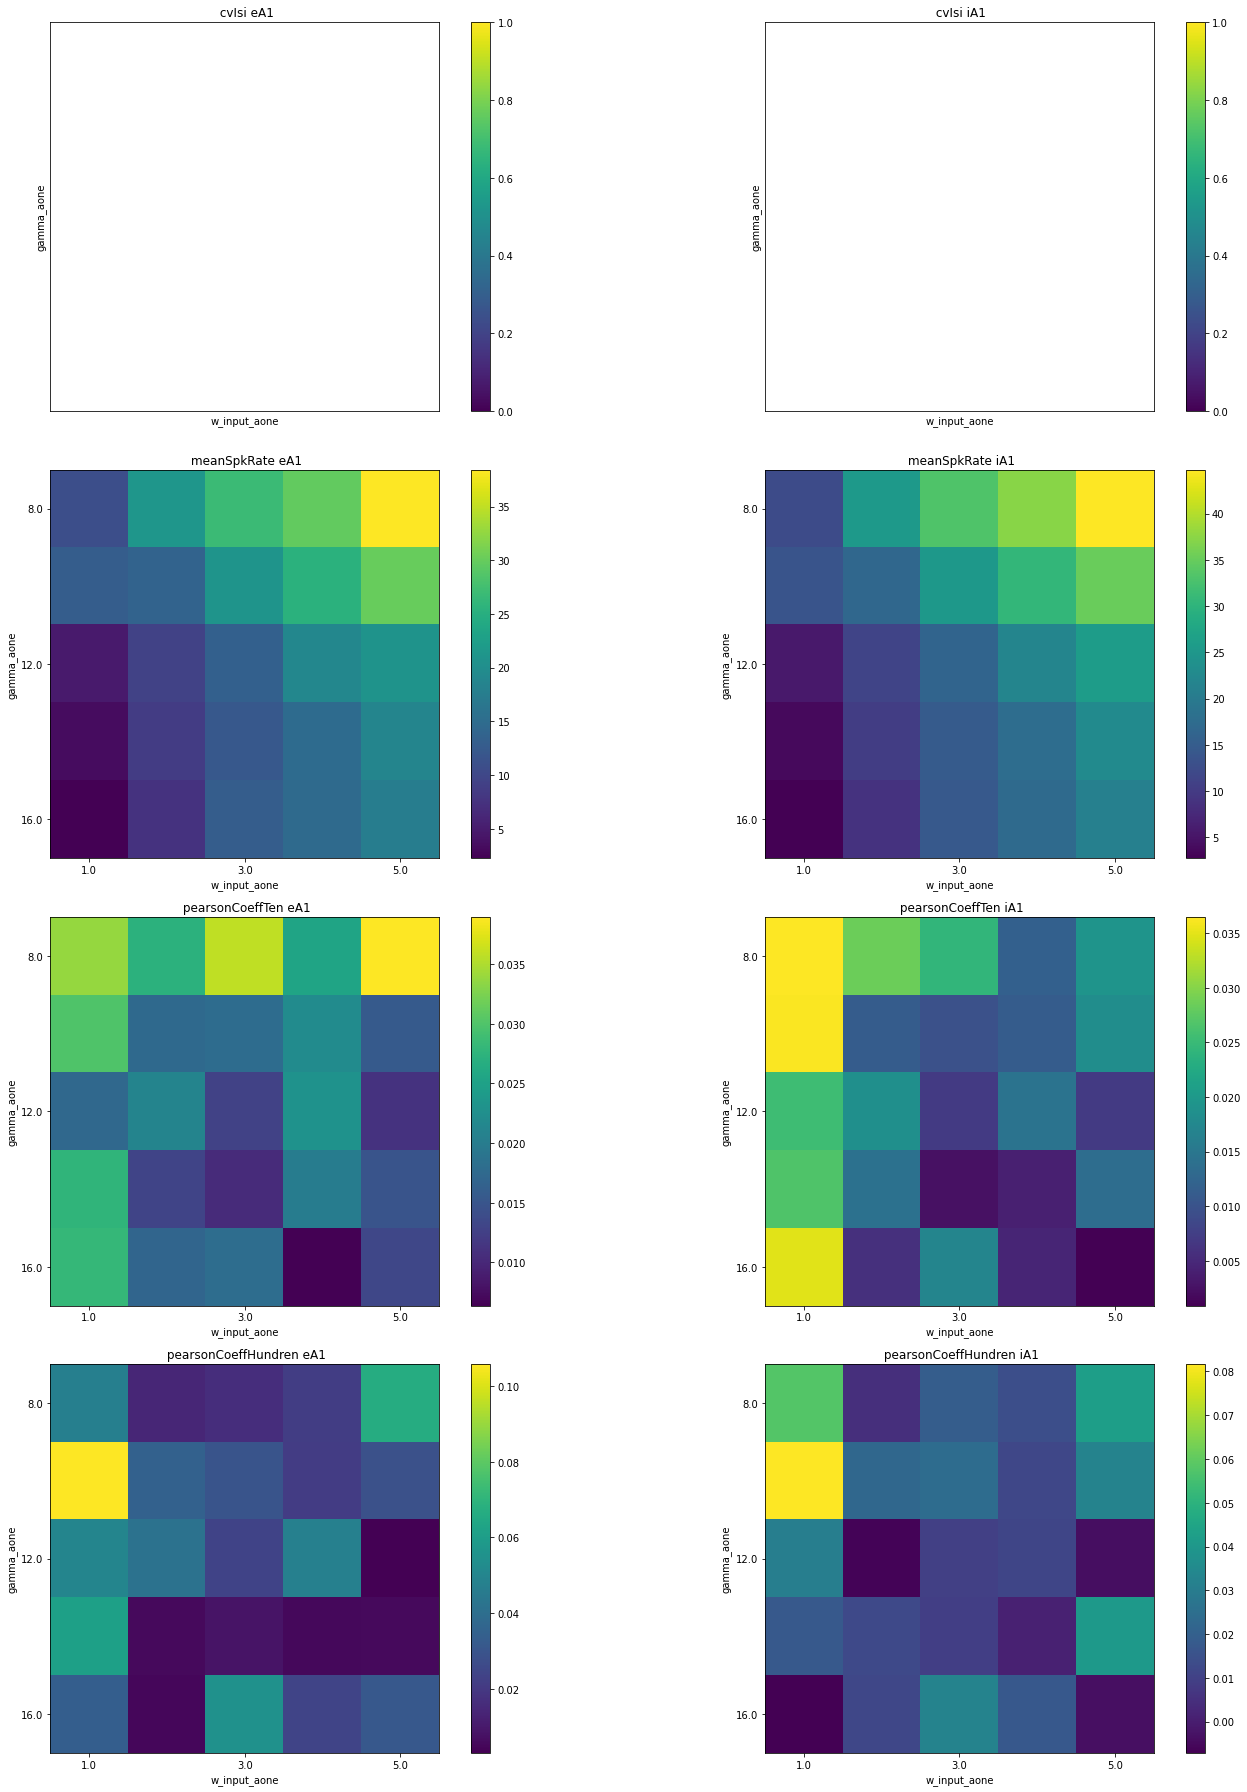

In [42]:
fig, ax = plt.subplots(nrows=4, ncols=2)

fig.set_size_inches(20, 25)
plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

varone = "gamma_aone"
vartwo = "w_input_aone"
parts = ["eA1", "iA1"]

dfFilter = df['aone_syntau_bgnoise_nuX_aone'] == 3
# dfFilter = [True] * df.shape[0]

pipeline.makesubplot(df[dfFilter], fig, ax[0], "cvIsi", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[1], "meanSpkRate", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[2], "pearsonCoeffTen", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[3], "pearsonCoeffHundren", varone, vartwo, parts)

#makesubplot(df[dfFilter], fig, ax[3], "meanBurstSpikePercentageCerina", varone, vartwo, parts)

#makesubplot(df[dfFilter], fig, ax[4], "meanBurstSpikePercentageMIT", varone, vartwo, parts)

fig.tight_layout()

#plt.savefig("/home/pbr-student/Downloads/thesis-plots/adaptation-aone_winputaone=15.pdf")

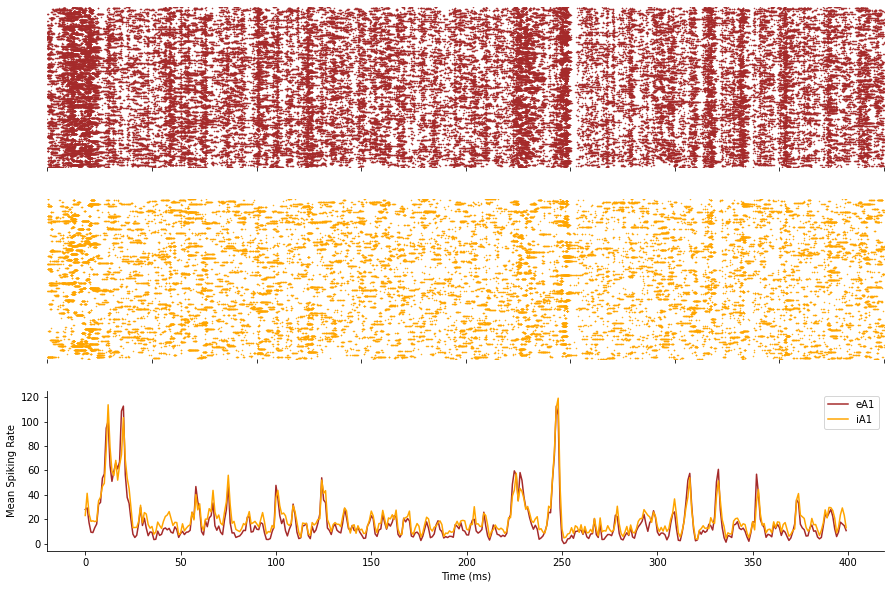

In [285]:
pth = "../demyelination/data/aone_syntau_bgnoise/activity/"
#f = ['spk_aone_syntau_bgnoise_nuX_aone=3_w_input_aone=4_gamma_aone=14']
f = ['spk_aone_syntau_bgnoise_nuX_aone=5_w_input_aone=3_gamma_aone=16']

p = pd.read_pickle(pth + f[0])
fig, ax = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches(15, 10)
#plt.ylim(0, 45)
#plt.title(f[0])

for x in [0, 1]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])

tstart = 1000
tstop = 5000
    
p.spikeobj['eA1'].time_slice(tstart, tstop).raster_plot(ax=ax[0], dt=10, display=False, color='brown', ms=1)
p.spikeobj['iA1'].time_slice(tstart, tstop).raster_plot(ax=ax[1], dt=10, display=False, color='orange', ms=1)

# x, y = smoothedspikes(p.spikeobj['eA1'].time_slice(tstart, tstop))
# ax[2].plot(x, y, label='eA1', c='brown')
ax[2].plot(p.spikeobj['eA1'].time_slice(tstart, tstop).firing_rate(10, average=True), label='eA1', c='brown')

# x, y = smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
# ax[2].plot(x, y, label='iA1', c='orange')
ax[2].plot(p.spikeobj['iA1'].time_slice(tstart, tstop).firing_rate(10, average=True), label='iA1', c='orange')

plt.xlabel("Time (ms)")
plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

# plt.xticks(range(0, 80+1, 10), range(tstart, tstop+1, 100))
ax[2].spines.right.set_visible(False)
ax[2].spines.top.set_visible(False)

ax[2].legend()

#plt.show()

# print("eA1 MEAN SPIKING RATE: ", p.spikeobj['eA1'].time_slice(500, 2000).mean_rate(), \
#       p.spikeobj['eA1'].time_slice(2000, 2100).mean_rate(),\
#       p.spikeobj['eA1'].time_slice(3000, 5000).mean_rate())
# print("iA1 MEAN SPIKING RATE: ", p.spikeobj['iA1'].time_slice(500, 2000).mean_rate(), \
#       p.spikeobj['iA1'].time_slice(2000, 2100).mean_rate(),\
#       p.spikeobj['iA1'].time_slice(3000, 5000).mean_rate())
# print("eA1 PEARSON COEFF: ",\
#     p.spikeobj['eA1'].time_slice(500, 4500).pairwise_pearson_corrcoeff(nb_pairs=500, time_bin=100)[0])

## aone_syntau_ctxweight
The activity is too bursty. A lower w_aone is explored in this experiment.

In [121]:
files2 = pipeline.readfiles("../demyelination/data/aone_syntau_ctxweight/activity/");
df = pipeline.preparedf(files2, (2000, 4000));

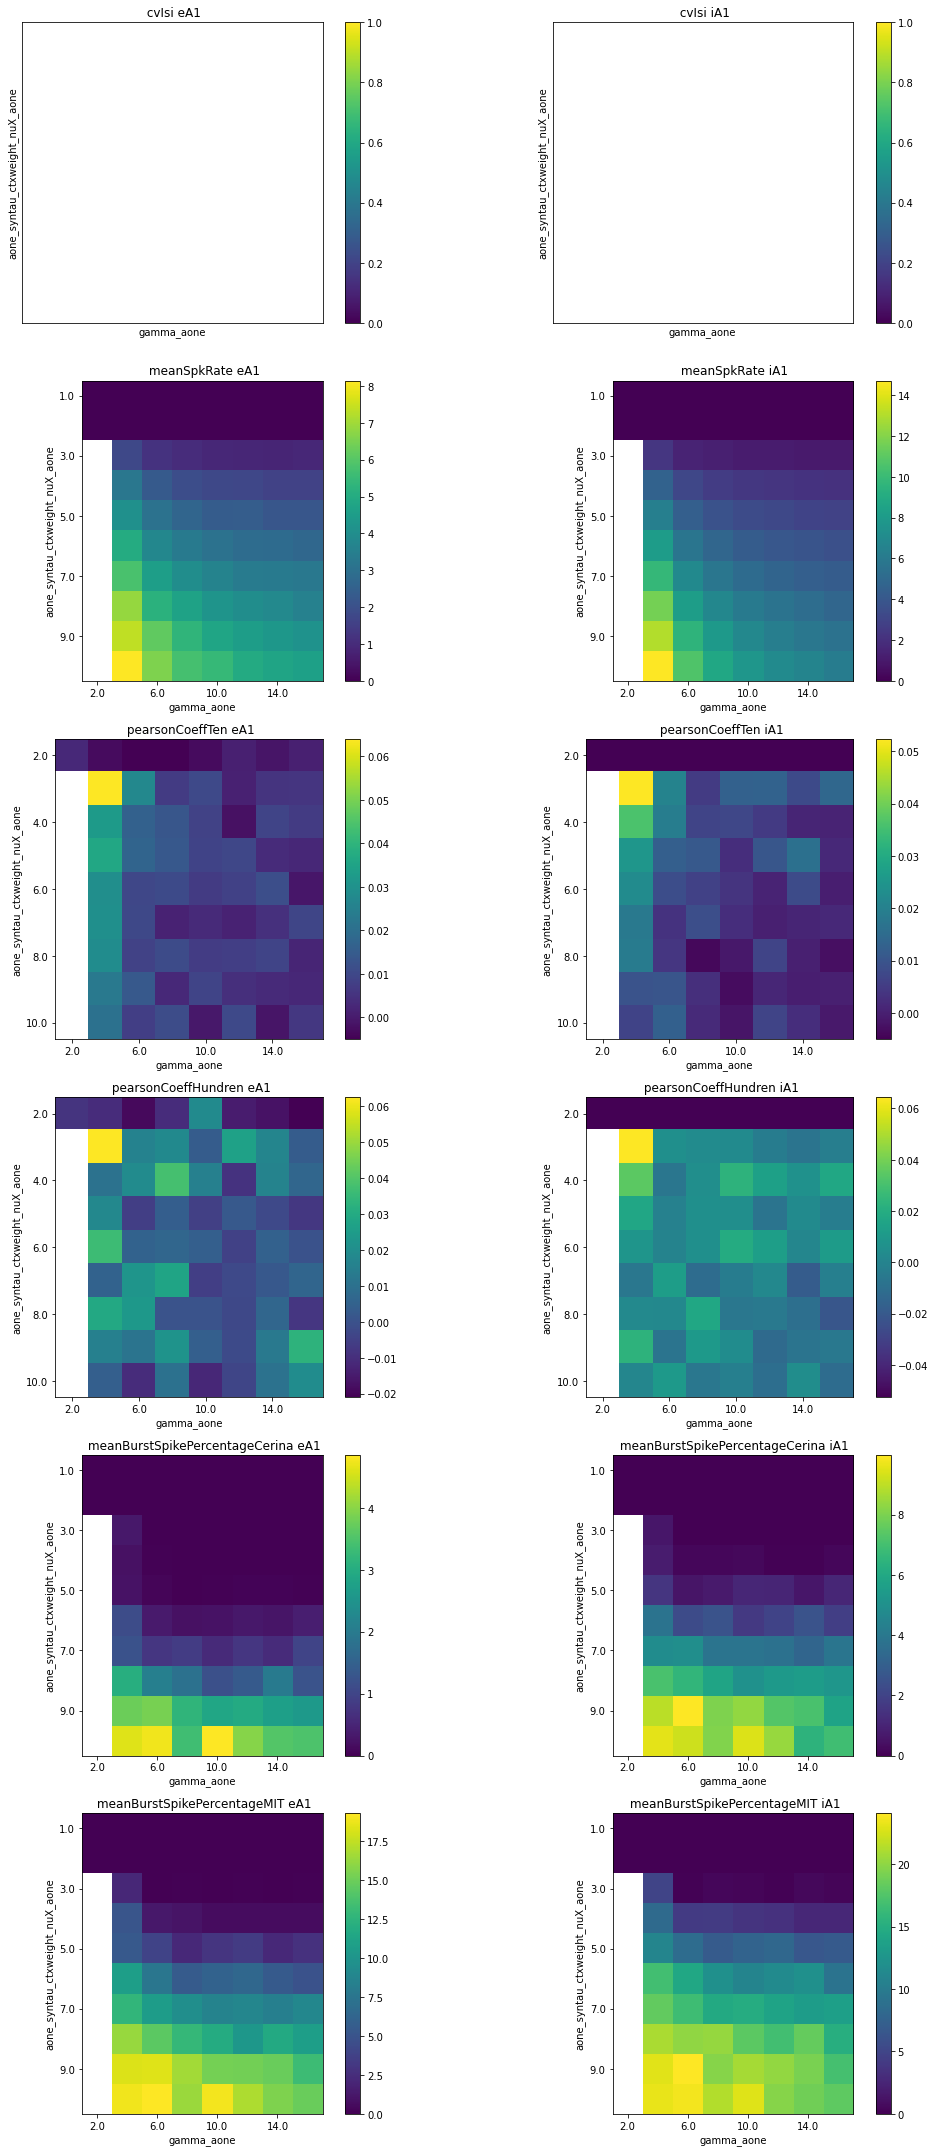

In [136]:
fig, ax = plt.subplots(nrows=6, ncols=2)

fig.set_size_inches(15, 30)
plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

varone = "aone_syntau_ctxweight_nuX_aone"
vartwo = "gamma_aone"
parts = ["eA1", "iA1"]

dfFilter = (df['w_input_aone'] == 1) & (df['w_aone'] == 1)
# dfFilter = [True] * df.shape[0]

pipeline.makesubplot(df[dfFilter], fig, ax[0], "cvIsi", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[1], "meanSpkRate", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[2], "pearsonCoeffTen", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[3], "pearsonCoeffHundren", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[4], "meanBurstSpikePercentageCerina", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[5], "meanBurstSpikePercentageMIT", varone, vartwo, parts)

fig.tight_layout()

#plt.savefig("/home/pbr-student/Downloads/thesis-plots/adaptation-aone_winputaone=15.pdf")

eA1 MEAN SPIKING RATE:  8.317
iA1 MEAN SPIKING RATE:  13.517333333333333


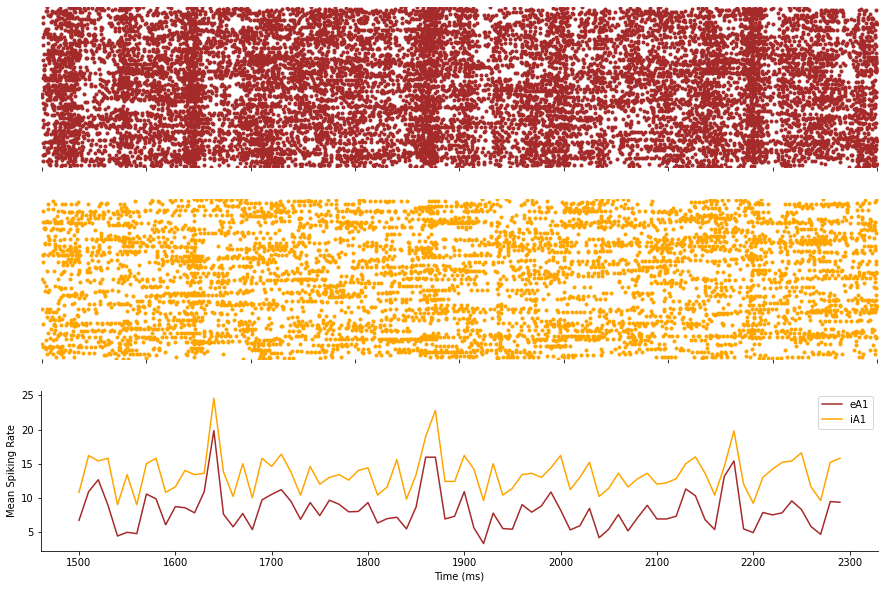

In [271]:
pth = "../demyelination/data/aone_syntau_ctxweight/activity/"
f = ['spk_aone_syntau_ctxweight_nuX_aone=6_w_input_aone=2_gamma_aone=6_w_aone=1']

p = pd.read_pickle(pth + f[0])
fig, ax = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches(15, 10)
#plt.ylim(0, 45)
#plt.title(f[0])

for x in [0, 1]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])

tstart = 1500
tstop = 2300
    
p.spikeobj['eA1'].time_slice(tstart, tstop).raster_plot(ax=ax[0], dt=10, display=False, color='brown')
p.spikeobj['iA1'].time_slice(tstart, tstop).raster_plot(ax=ax[1], dt=10, display=False, color='orange')

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].time_slice(tstart, tstop))
# ax[2].plot(x, y, label='eA1', c='brown')
ax[2].plot(p.spikeobj['eA1'].time_slice(tstart, tstop).firing_rate(10, average=True), label='eA1', c='brown')

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
# ax[2].plot(x, y, label='iA1', c='orange')
ax[2].plot(p.spikeobj['iA1'].time_slice(tstart, tstop).firing_rate(10, average=True), label='iA1', c='orange')

plt.xlabel("Time (ms)")
plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

plt.xticks(range(0, 80+1, 10), range(tstart, tstop+1, 100))
ax[2].spines.right.set_visible(False)
ax[2].spines.top.set_visible(False)

ax[2].legend()

print("eA1 MEAN SPIKING RATE: ", p.spikeobj['eA1'].time_slice(500, 2000).mean_rate())
print("iA1 MEAN SPIKING RATE: ", p.spikeobj['iA1'].time_slice(500, 2000).mean_rate())


## aone_syntau_diffnoisew
We need different weights for the connection from the bg noise to the A1.

In [138]:
files2 = pipeline.readfiles("../demyelination/data/aone_syntau_diffnoisew/activity/");
df = pipeline.preparedf(files2, (2000, 4000));

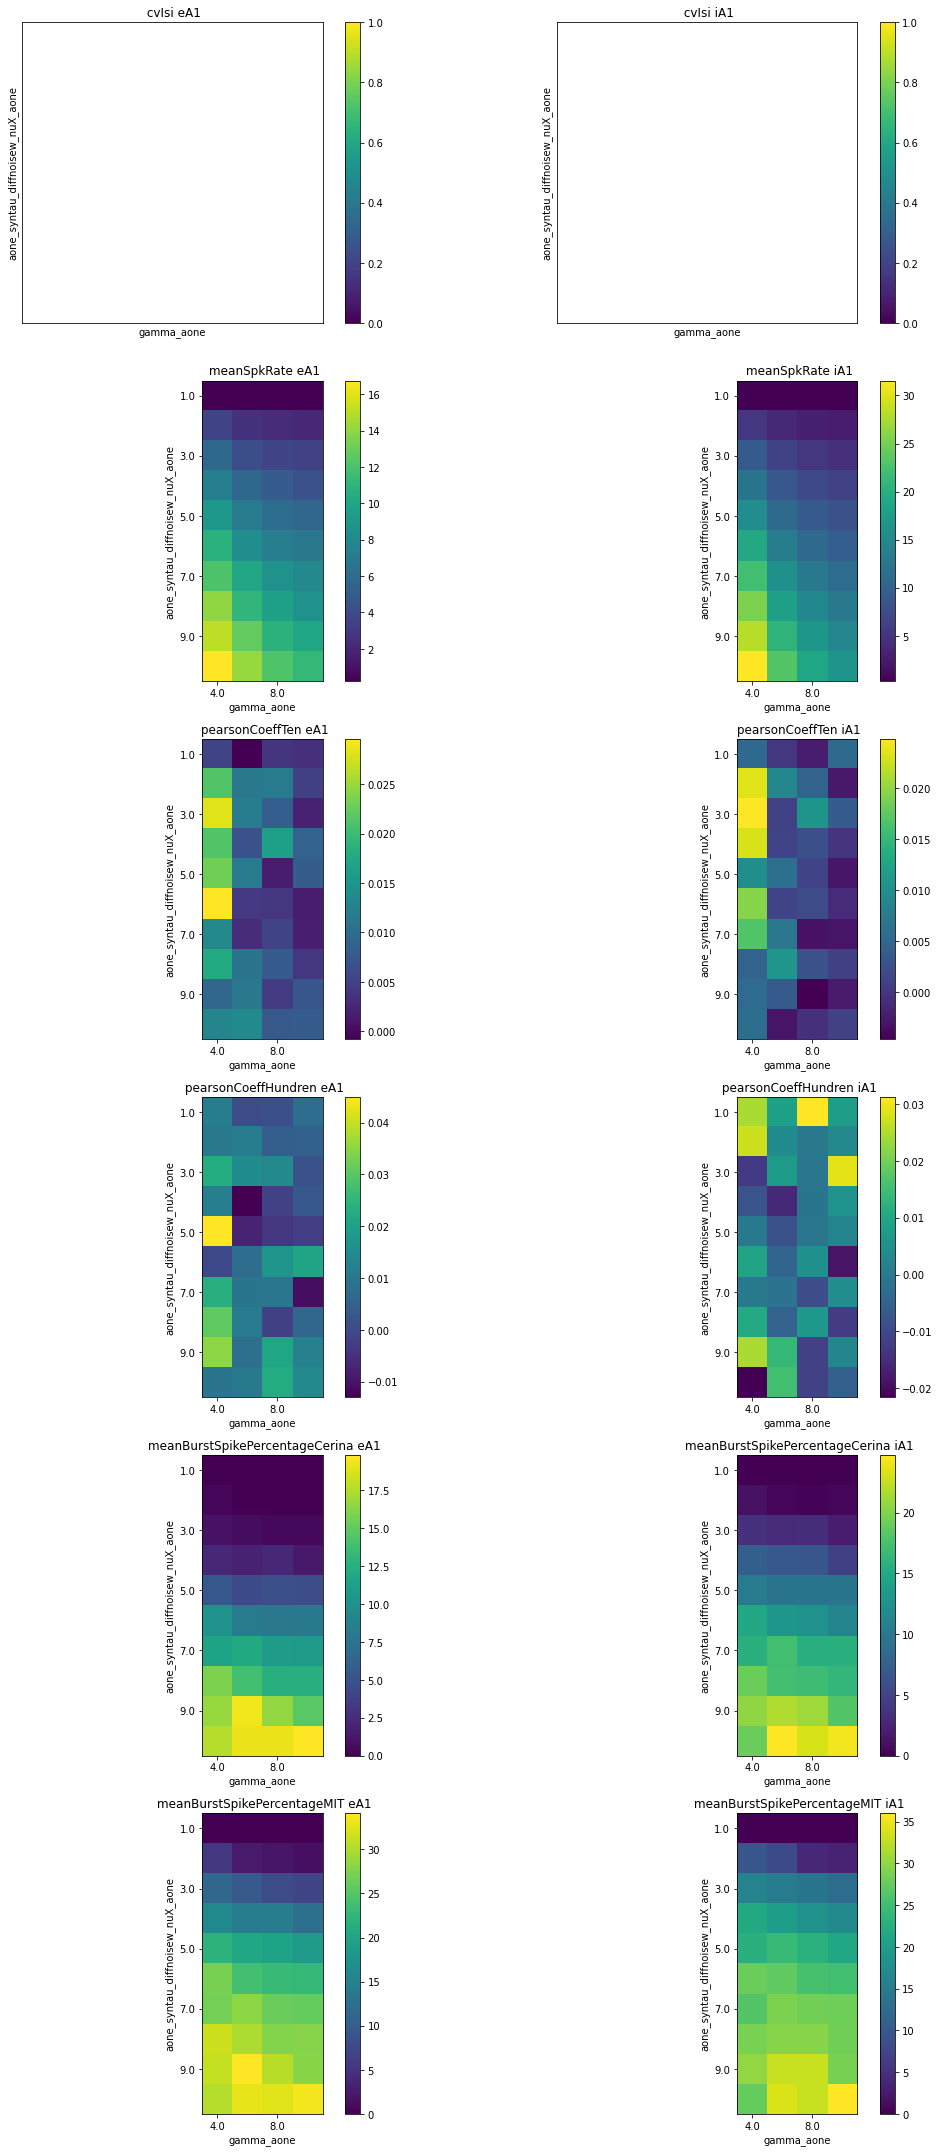

In [244]:
fig, ax = plt.subplots(nrows=6, ncols=2)

fig.set_size_inches(15, 30)
plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

varone = "aone_syntau_diffnoisew_nuX_aone"
vartwo = "gamma_aone"
parts = ["eA1", "iA1"]

dfFilter = (df['w_input_Iaone'] == 2) & (df['w_input_Eaone'] == 2)
# dfFilter = [True] * df.shape[0]

pipeline.makesubplot(df[dfFilter], fig, ax[0], "cvIsi", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[1], "meanSpkRate", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[2], "pearsonCoeffTen", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[3], "pearsonCoeffHundren", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[4], "meanBurstSpikePercentageCerina", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[5], "meanBurstSpikePercentageMIT", varone, vartwo, parts)

fig.tight_layout()

#plt.savefig("/home/pbr-student/Downloads/thesis-plots/adaptation-aone_winputaone=15.pdf")

In [276]:
df[df.w_input_Eaone==2][df.w_input_Iaone==2][df.gamma_aone==6][df.aone_syntau_diffnoisew_nuX_aone==6]

,aone_syntau_diffnoisew_nuX_aone,w_input_Eaone,w_input_Iaone,gamma_aone,brainPart,meanSpkRate,pearsonCoeffTen,pearsonCoeffHundren,cvIsi,meanBurstSpikePercentageCerina,meanBurstSpikePercentageMIT
150,6.0,2.0,2.0,6.0,eA1,8.358596,0.004195,0.007789,NaN,8.215011,23.887024
1233,6.0,2.0,2.0,6.0,iA1,13.434258,0.001301,-0.004468,NaN,12.966574,27.210599


eA1 MEAN SPIKING RATE:  9.088
iA1 MEAN SPIKING RATE:  14.96


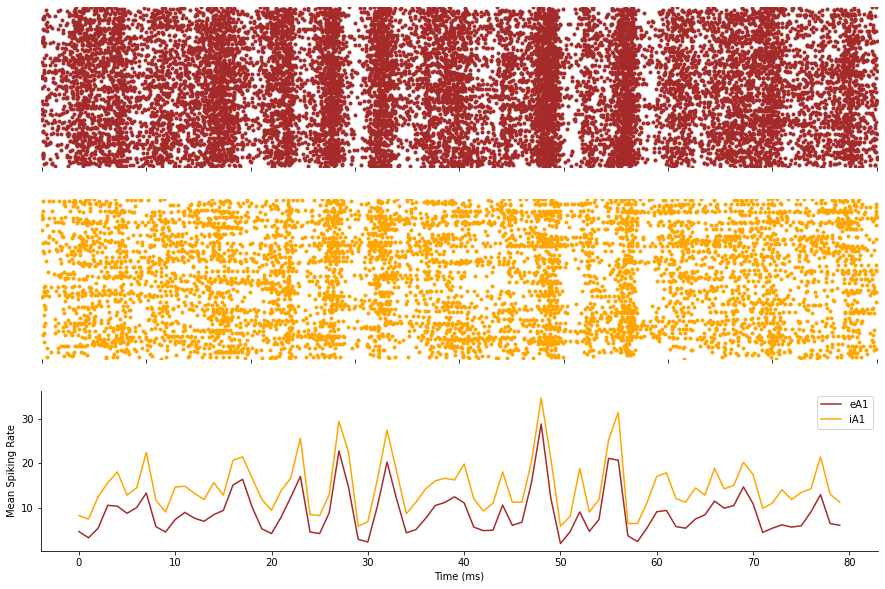

In [255]:
pth = "../demyelination/data/aone_syntau_diffnoisew/activity/"
f = ['spk_aone_syntau_diffnoisew_nuX_aone=3_w_input_Eaone=3_w_input_Iaone=3_gamma_aone=4']

p = pd.read_pickle(pth + f[0])
fig, ax = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches(15, 10)
#plt.ylim(0, 45)
#plt.title(f[0])

for x in [0, 1]:
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])

tstart = 1500
tstop = 2300
    
p.spikeobj['eA1'].time_slice(tstart, tstop).raster_plot(ax=ax[0], dt=10, display=False, color='brown')
p.spikeobj['iA1'].time_slice(tstart, tstop).raster_plot(ax=ax[1], dt=10, display=False, color='orange')

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].time_slice(tstart, tstop))
# ax[2].plot(x, y, label='eA1', c='brown')
ax[2].plot(p.spikeobj['eA1'].time_slice(tstart, tstop).firing_rate(10, average=True), label='eA1', c='brown')

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
# ax[2].plot(x, y, label='iA1', c='orange')
ax[2].plot(p.spikeobj['iA1'].time_slice(tstart, tstop).firing_rate(10, average=True), label='iA1', c='orange')

plt.xlabel("Time (ms)")
plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

# plt.xticks(range(0, 80+1, 10), range(tstart, tstop+1, 100))
ax[2].spines.right.set_visible(False)
ax[2].spines.top.set_visible(False)

ax[2].legend()

#plt.show()

print("eA1 MEAN SPIKING RATE: ", p.spikeobj['eA1'].time_slice(500, 2000).mean_rate())
print("iA1 MEAN SPIKING RATE: ", p.spikeobj['iA1'].time_slice(500, 2000).mean_rate())
